In [1]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas
df_member = pd.read_csv('data/member.csv') #载入数据集
df_member.head() #显示数据头几行

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,女,是,是,否,是,否,是,是,否,年卡,9,手工转账,65.6,593.3,否
1,2,男,否,否,否,否,否,否,否,是,月卡,9,手工转账,59.9,542.4,否
2,3,男,否,否,否,否,是,否,否,否,月卡,4,就餐时付费,73.9,280.85,是
3,4,男,是,否,否,是,是,否,是,是,月卡,13,就餐时付费,98.0,1237.85,是
4,5,女,否,是,否,否,否,是,是,是,月卡,9,花呗付款,69.4,571.45,否


In [2]:
df_member.describe() # 显示数据集数值字段概率

from utils import set_chinese_label
set_chinese_label()

In [3]:
from pandas.api.types import is_numeric_dtype #导入is_numeric_dtype工具
is_numeric_dtype(df_member['总消费']) #是否为数值字段？

False

In [4]:
df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce') #把总消费字段转换成数值字段
df_member['总消费'].fillna(0, inplace=True) #补充0值
is_numeric_dtype(df_member['总消费']) #是否为数值字段？

True

In [5]:
df_member.describe() # 显示数据集数值字段概率

,用户码,入会月数,平均月消费,总消费
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,3522.000000,32.371149,64.761692,2279.734304
std,2033.283305,24.559481,30.090047,2266.794470
min,1.000000,0.000000,18.250000,0.000000
25%,1761.500000,9.000000,35.500000,398.550000
50%,3522.000000,29.000000,70.350000,1394.550000
75%,5282.500000,55.000000,89.850000,3786.600000
max,7043.000000,72.000000,118.750000,8684.800000


     用户码  玫瑰套餐  紫罗兰套餐  郁金香套餐  百合套餐  康乃馨套餐  胡姬花套餐  生日套餐  情人节套餐  会员卡类型  入会月数  \
性别                                                                           
女   3488  3488   3488   3488  3488   3488   3488  3488   3488   3488  3488   
男   3555  3555   3555   3555  3555   3555   3555  3555   3555   3555  3555   

    会费支付方式  平均月消费   总消费  已停付会费  
性别                              
女     3488   3488  3488   3488  
男     3555   3555  3555   3555  


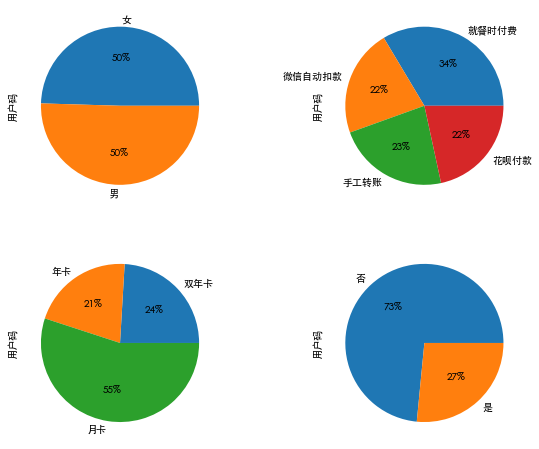

In [6]:
print(df_member.groupby('性别').count())

import matplotlib.pyplot as plt #导入绘图工具
plt.figure(figsize=(10,8)) #图片大小
plt.subplot(2, 2, 1) #子图1
ax = df_member.groupby('性别').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图1
plt.subplot(2, 2, 2) #子图2
ax = df_member.groupby('会费支付方式').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图2
plt.subplot(2, 2, 3) #子图3
ax = df_member.groupby('会员卡类型').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图3
plt.subplot(2, 2, 4) #子图4
ax = df_member.groupby('已停付会费').count()['用户码'].plot.pie(autopct='%1.0f%%') #饼图4
plt.show() #显示

In [7]:
# 把汉字转换成0、1值
df_member['已停付会费'].replace(to_replace='是', value=1, inplace=True)
df_member['已停付会费'].replace(to_replace='否',  value=0, inplace=True)
df_member['性别'].replace(to_replace='女', value=0, inplace=True)
df_member['性别'].replace(to_replace='男', value=1, inplace=True)

In [8]:
# 其它的是、否字段转换成布尔型数据
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', 
                   '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'
    
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,会员卡类型,入会月数,会费支付方式,平均月消费,总消费,已停付会费
0,1,0,True,True,False,True,False,True,True,False,年卡,9,手工转账,65.60,593.30,0
1,2,1,False,False,False,False,False,False,False,True,月卡,9,手工转账,59.90,542.40,0
2,3,1,False,False,False,False,True,False,False,False,月卡,4,就餐时付费,73.90,280.85,1
3,4,1,True,False,False,True,True,False,True,True,月卡,13,就餐时付费,98.00,1237.85,1
4,5,0,False,True,False,False,False,True,True,True,月卡,9,花呗付款,69.40,571.45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,年卡,13,手工转账,55.15,742.90,0
7039,7040,1,False,False,False,True,False,False,False,False,月卡,2,手工转账,50.30,92.75,0
7040,7041,1,True,False,False,False,False,False,False,True,月卡,22,就餐时付费,85.10,1873.70,1
7041,7042,1,True,True,True,False,True,True,False,True,双年卡,67,手工转账,67.85,4627.65,0


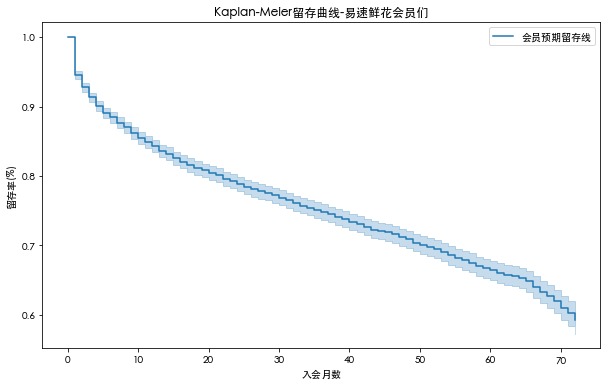

In [9]:
import lifelines #导入生存分析工具包
kmf = lifelines.KaplanMeierFitter() #创建KMF模型
kmf.fit(df_member['入会月数'], #拟合易速鲜花会员流失数据
        event_observed=df_member['已停付会费'], 
        label='会员预期留存线')
fig, ax = plt.subplots(figsize=(10,6)) #画布
kmf.plot(ax=ax) #绘图
ax.set_title('Kaplan-Meier留存曲线-易速鲜花会员们') #图题
ax.set_xlabel('入会月数') #X轴标签
ax.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

In [10]:
def life_by_cat(feature, t='入会月数', event='已停付会费', df=df_member, ax=None): #定义分类留存曲线函数
    for cat in df[feature].unique(): #遍历类别
        idx = df[feature] == cat #当前类别
        kmf = lifelines.KaplanMeierFitter() #创建KaplanMeier模型
        kmf.fit(df[idx][t], event_observed=df[idx][event], label=cat) #拟合模型
        kmf.plot(ax=ax, label=cat) #绘图

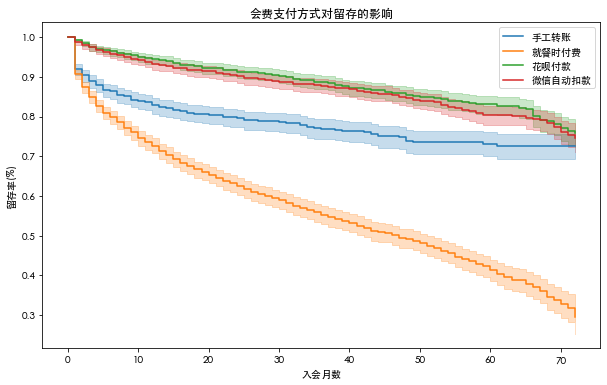

In [11]:
fig_pmt, ax_pmt = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='会费支付方式', ax=ax_pmt) #调用函数
ax_pmt.set_title('会费支付方式对留存的影响') #图题
ax_pmt.set_xlabel('入会月数') #X轴标签
ax_pmt.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

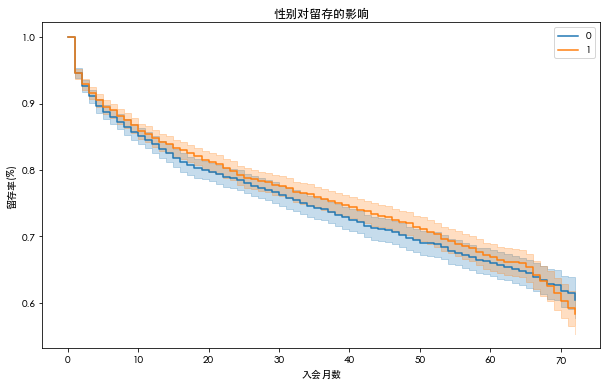

In [12]:
fig_gender, ax_gender = plt.subplots(figsize=(10,6)) #画布
life_by_cat(feature='性别', ax=ax_gender) #调用函数
ax_gender.set_title('性别对留存的影响') #图题
ax_gender.set_xlabel('入会月数') #X轴标签
ax_gender.set_ylabel('留存率(%)') #Y轴标签
plt.show() #显示图片

### Cox

In [13]:
#把分类字段转换为哑编码
category_features = ['会员卡类型', '会费支付方式'] #要转换的分类的字段
df_member = pd.get_dummies(df_member, #哑变量的个数会比总类别数少1 
                           drop_first=True, #这是因为drop_first=True
                           columns=category_features) #这能够避免回归中的多重共线性问题 
df_member #显示数据

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,1,0,0,1,0
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,0,1,0,1,0
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,0,1,0,0,0
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,0,1,0,0,0
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,1,0,0,1,0
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,0,1,0,1,0
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,0,1,0,0,0
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,0,0,0,1,0


In [14]:
cph = lifelines.CoxPHFitter() #创建CoxPH模型

In [15]:
cph.fit(df_member, duration_col='入会月数', #拟合模型
        event_col='已停付会费', show_progress=False)

<lifelines.CoxPHFitter: fitted with 7043 total observations, 5174 right-censored observations>

<AxesSubplot:>

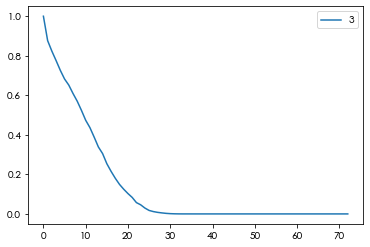

In [16]:
#显示会员生存曲线
cph.predict_survival_function(df_member.loc[3]).plot()

<AxesSubplot:title={'center':'各个特征的留存相关系数'}, xlabel='log(HR) (95% CI)'>

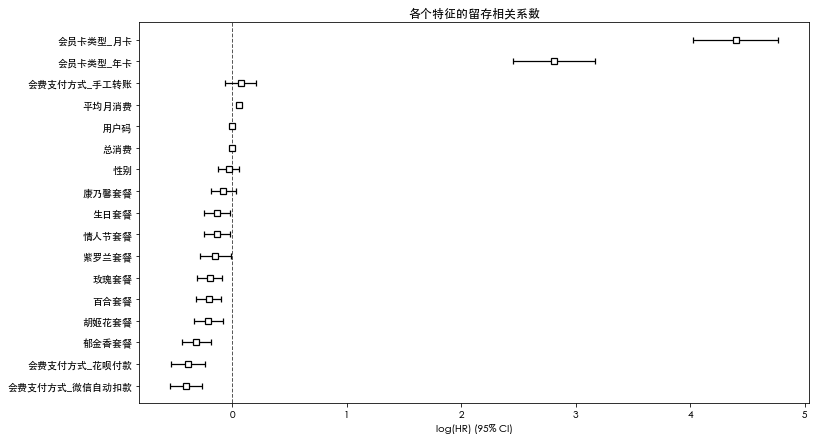

In [17]:
fig, ax = plt.subplots(figsize=(12,7)) #画布
ax.set_title('各个特征的留存相关系数') #图题
cph.plot(ax=ax) #绘图

In [18]:
X = df_member.drop(['用户码','已停付会费'], axis = 1) # 构建特征集，用户码字段属于无用特征
y = df_member.已停付会费.values # 构建标签集

In [28]:
from sklearn.model_selection import train_test_split #导入train_test_split模块
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #拆分数据集

### 逻辑回归

In [20]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
logreg = LogisticRegression() # lr,就代表是逻辑回归模型

In [21]:
logreg.fit(X_train,y_train) #拟合模型

/Users/01398068/.pyenv/versions/3.7.3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [22]:
print("SK-learn逻辑回归测试准确率{:.2f}%".format(logreg.score(X_test,y_test)*100))   #模型分数

SK-learn逻辑回归测试准确率79.91%


In [23]:
y_pred = logreg.predict(X_test) #对测试集进行预测
print("测试集第一个用户预测结果", y_pred[0]) #第一个用户预测结果

测试集第一个用户预测结果 0


### DNN神经网络

In [26]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
dnn = Sequential() # 创建一个序贯DNN模型
dnn.add(Dense(units=12, input_dim=17, activation = 'relu')) # 添加输入层
dnn.add(Dense(units=24, activation = 'relu')) # 添加隐层
dnn.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
dnn.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
dnn.compile(optimizer = 'RMSProp', #优化器
            loss = 'binary_crossentropy', #损失函数
            metrics = ['acc']) #评估标准

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                216       
                                                                 
 dense_4 (Dense)             (None, 24)                312       
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 553
Trainable params: 553
Non-trainable params: 0
_________________________________________________________________


In [29]:
X_train

,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
6071,1,True,True,True,True,True,True,True,True,72,115.75,8399.15,0,0,0,0,1
2706,1,True,True,True,False,False,False,True,False,71,66.20,4692.55,1,0,0,0,0
3539,0,True,True,True,False,False,True,False,True,30,66.30,1923.50,0,1,1,0,0
4153,0,False,False,True,False,True,False,False,True,60,44.45,2773.90,1,0,0,0,0
2205,1,True,True,True,True,True,True,False,False,60,65.85,3928.30,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2701,0,False,False,False,True,False,True,False,False,35,85.30,2917.50,0,1,0,0,1
5480,0,False,False,False,False,True,False,True,True,26,100.50,2599.95,0,1,1,0,0
4525,1,True,False,True,True,True,True,False,False,46,65.65,3047.15,0,0,0,1,0
3487,1,False,False,False,False,True,True,False,False,27,59.45,1611.65,0,1,0,0,0


In [30]:
X_train = np.asarray(X_train).astype(np.float32) # 转换为NumPy张量
print(X_train)
X_test = np.asarray(X_test).astype(np.float32) # 转换为NumPy张量
history = dnn.fit(X_train, y_train, # 指定训练集
              epochs=30,        # 指定训练的轮次
              batch_size=64,    # 指定数据批量
              validation_split=0.2) #这里直接从训练集数据中拆分验证集，更方便

[[1. 1. 1. ... 0. 0. 1.]
 [1. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 ...
 [1. 1. 0. ... 0. 1. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
Epoch 1/30
71/71 [==============================] - 1s 3ms/step - loss: 13.4215 - acc: 0.6022 - val_loss: 0.8623 - val_acc: 0.7560
Epoch 2/30
71/71 [==============================] - 0s 1ms/step - loss: 1.7153 - acc: 0.6916 - val_loss: 1.0186 - val_acc: 0.7516
Epoch 3/30
71/71 [==============================] - 0s 1ms/step - loss: 1.3302 - acc: 0.6947 - val_loss: 0.6240 - val_acc: 0.7640
Epoch 4/30
71/71 [==============================] - 0s 1ms/step - loss: 1.4087 - acc: 0.6876 - val_loss: 1.4548 - val_acc: 0.7631
Epoch 5/30
71/71 [==============================] - 0s 1ms/step - loss: 1.3023 - acc: 0.7018 - val_loss: 2.5851 - val_acc: 0.7560
Epoch 6/30
71/71 [==============================] - 0s 1ms/step - loss: 1.3111 - acc: 0.7087 - val_loss: 2.7827 - val_acc: 0.3150
Epoch 7/30
71/71 [==============================] - 0s 1ms/step

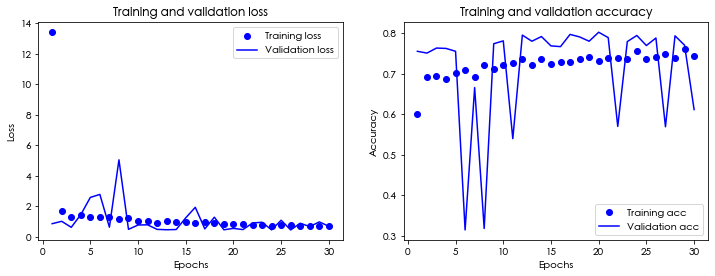

In [31]:
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss'] #训练损失
    val_loss = history.history['val_loss'] #验证损失
    epochs = range(1, len(loss) + 1) #训练轮次
    plt.figure(figsize=(12,4)) # 图片大小
    plt.subplot(1, 2, 1) #子图1
    plt.plot(epochs, loss, 'bo', label='Training loss') #训练损失
    plt.plot(epochs, val_loss, 'b', label='Validation loss') #验证损失
    plt.title('Training and validation loss') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Loss') #Y轴文字
    plt.legend() #图例
    acc = history.history['acc'] #训练准确率
    val_acc = history.history['val_acc'] #验证准确率
    plt.subplot(1, 2, 2) #子图2
    plt.plot(epochs, acc, 'bo', label='Training acc') #训练准确率
    plt.plot(epochs, val_acc, 'b', label='Validation acc') #验证准确率
    plt.title('Training and validation accuracy') #图题
    plt.xlabel('Epochs') #X轴文字
    plt.ylabel('Accuracy') #Y轴文字
    plt.legend() #图例
    plt.show() #绘图

show_history(history) # 调用这个函数

In [32]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN的测试准确率为',"{0:.2f}%".format(result[1])*100)

45/45 [==============================] - 0s 802us/step - loss: 0.6854 - acc: 0.5855
DNN的测试准确率为 0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%0.59%


In [34]:
prediction = dnn.predict(X_test) #预测测试集的图片分类
print('第一个用户分类结果为:', prediction[0])
print('第一个用户分类结果为:', np.argmax(prediction[0]))

第一个用户分类结果为: [0.01298305]
第一个用户分类结果为: 0


### 归一化

In [36]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_test = scaler.transform(X_test) #转换测试集数据

Epoch 1/30
71/71 [==============================] - 0s 2ms/step - loss: 0.5405 - acc: 0.7393 - val_loss: 0.5243 - val_acc: 0.7223
Epoch 2/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4923 - acc: 0.7462 - val_loss: 0.4915 - val_acc: 0.7418
Epoch 3/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4705 - acc: 0.7606 - val_loss: 0.4740 - val_acc: 0.7720
Epoch 4/30
71/71 [==============================] - 0s 2ms/step - loss: 0.4593 - acc: 0.7748 - val_loss: 0.4645 - val_acc: 0.7702
Epoch 5/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4528 - acc: 0.7737 - val_loss: 0.4589 - val_acc: 0.7755
Epoch 6/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4472 - acc: 0.7766 - val_loss: 0.4529 - val_acc: 0.7755
Epoch 7/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4422 - acc: 0.7792 - val_loss: 0.4481 - val_acc: 0.7782
Epoch 8/30
71/71 [==============================] - 0s 1ms/step - loss: 0.4384 - acc: 0.78

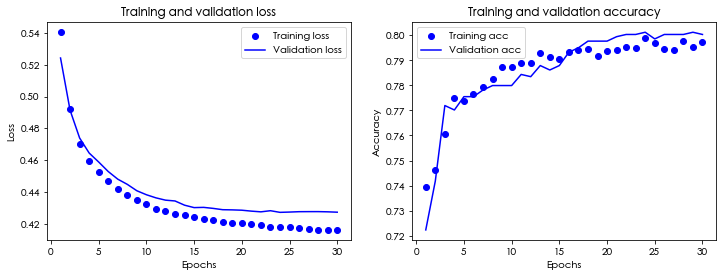

In [37]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #指定验证集,这里为了简化模型，直接用训练集数据
show_history(history) # 调用这个函数

In [38]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN（归一化之后）的测试准确率为',"{0:.2f}%".format(result[1])*100)

45/45 [==============================] - 0s 961us/step - loss: 0.4429 - acc: 0.7956
DNN（归一化之后）的测试准确率为 0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%0.80%
